# Which Factors Influence the Price of Health Insurance?

We will build a Linear regression model for Medical cost dataset. The dataset consists of age, sex, BMI(body mass index), children, smoker and region feature, which are independent and charge as a dependent feature. We will predict individual medical costs billed by health insurance.

# Definition
**Linear regression** is a **supervised learining** algorithm used when target / dependent variable  **continues** real number. It establishes relationship between dependent variable $y$ and one or more independent variable $x$ using best fit line.   It work on the principle of ordinary least square $(OLS)$ / Mean square errror $(MSE)$. In statistics ols is method to estimated unkown parameter of linear regression function, it's goal is to minimize sum of square difference between observed dependent variable in the given data set and those predicted by linear regression fuction. 

## Hypothesis representation

We will use $\mathbf{x_i}$ to denote the independent variable and $\mathbf{y_i}$ to denote dependent variable. A pair of $\mathbf{(x_i,y_i)}$ is called training example. The subscripe $\mathbf{i}$ in the notation is simply index into the training set. We have $\mathbf{m}$ training example then $\mathbf{i = 1,2,3,...m}$.

The goal of supervised learning is to learn a *hypothesis function $\mathbf{h}$*, for a given training set that can used to estimate $\mathbf{y}$ based on $\mathbf{x}$. So hypothesis fuction represented as 
>
>$$\mathbf{ h_\theta(x_{i}) = \theta_0 + \theta_1x_i }$$   

$\mathbf{\theta_0,\theta_1}$ are parameter of hypothesis.This is equation for **Simple / Univariate Linear regression**. 

For **Multiple Linear regression** more than one independent variable exit then we will use $\mathbf{x_{ij}}$ to denote indepedent variable and $\mathbf{y_{i}}$ to denote dependent variable. We have $\mathbf{n}$ independent variable then $\mathbf{j=1,2,3 ..... n}$. The hypothesis function represented as
>
>$$\mathbf{h_\theta(x_{i}) = \theta_0 + \theta_1x_{i1} + \theta_2 x_{i2} + ..... \theta_j x_{ij} ...... \theta_n  x_{mn} }$$

$\mathbf{\theta_0,\theta_1,....\theta_j....\theta_n }$ are parameter of hypothesis,
$\mathbf{m}$ Number of training exaples,
$\mathbf{n}$ Number of independent variable,
$\mathbf{x_{ij}}$ is $\mathbf{i^{th}}$ training exaple of $\mathbf{j^{th}}$ feature.


In [37]:
import os
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as smd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip
from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] =14
plt.rcParams['font.weight']= 'bold'
plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
cwd = os.getcwd()
cwd

'C:\\Users\\azdnh7b\\OneDrive-Deere&Co\\OneDrive - Deere & Co\\Documents\\my_resources\\UPGRAD\\linear-regression\\health-insurance-cost-prediction'

In [3]:
df = pd.read_csv(os.path.join(cwd, 'price_of_health_insurance_data.csv'))
print('\nNumber of rows and columns in the data set: ',df.shape)
print('')
df.head()


Number of rows and columns in the data set:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


There are $\mathbf{m=1338}$ training exaple and $\mathbf{n=7}$ independent variable. The target variable here is charges and remaining six variables such as age, sex, bmi, children, smoker, region are independent variable. 

There are multiple independent variable, so we need to fit Multiple linear regression. Then the hypothesis function looks like

>$$\mathbf{ h_\theta(x_{i}) = \theta_0+\theta_1 age + \theta_2 sex + \theta_3 bmi + \theta_4 children + \theta_5 smoker + \theta_6 region }$$
>

## Matrix Formulation

In general we can write above vector as $$ \mathbf{ x_{ij}} = \left( \begin{smallmatrix} \mathbf{x_{i1}} & \mathbf{x_{i2}} &.&.&.& \mathbf{x_{in}} \end{smallmatrix} \right)$$
>
Now we combine all aviable individual vector into single input matrix of size $(m,n)$ and denoted it by >$\mathbf{X}$ input matrix, which consist of all training exaples,
>$$\mathbf{X} = \left( \begin{smallmatrix} x_{11} & x_{12} &.&.&.&.& x_{1n}\\
                                x_{21} & x_{22} &.&.&.&.& x_{2n}\\
                                x_{31} & x_{32} &.&.&.&.& x_{3n}\\
                                .&.&.&. &.&.&.& \\
                                .&.&.&. &.&.&.& \\
                                x_{m1} & x_{m2} &.&.&.&.&. x_{mn}\\
                                \end{smallmatrix} \right)_{(m,n)}$$

We represent parameter of function and dependent variable in vactor form as  
>$$\theta = \left (\begin{matrix} \theta_0 \\ \theta_1 \\ .\\.\\ \theta_j\\.\\.\\ \theta_n \end {matrix}\right)_{(n+1,1)} 
\mathbf{ y } = \left (\begin{matrix} y_1\\ y_2\\. \\. \\ y_i \\. \\. \\ y_m \end{matrix} \right)_{(m,1)}$$

So we represent hypothesis function in vectorize form $$\mathbf{ h_\theta{(x)} = X\theta}$$.



## Cost function

A cost function measures how much error in the model is in terms of ability to estimate the relationship between $x$ and $y$. 
We can measure the accuracy of our hypothesis function by using a cost function. This takes an average difference of observed dependent variable in the given the dataset and those predicted by the hypothesis function.
 
>$$\mathbf{J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
>$$\mathbf{J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x_i) - y_i)^2}$$

# Exploratory data analysis

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# Check for missing value

print(df.isnull().sum())

# plt.figure(figsize=(12, 4))
# sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
# plt.title('Missing value in the dataset');

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


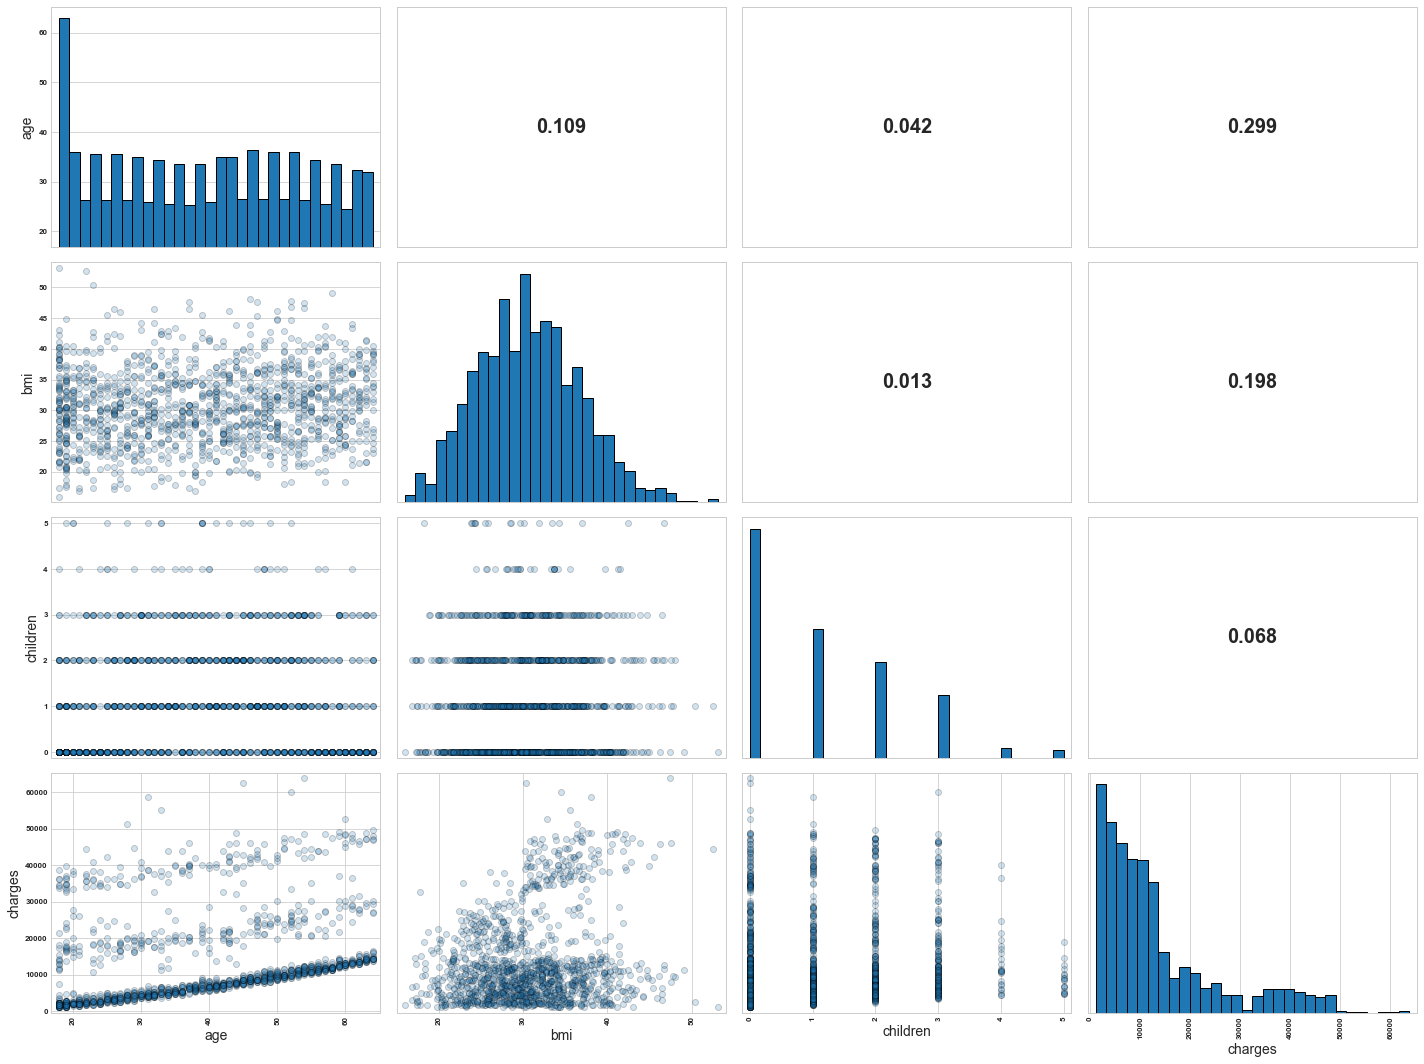

In [6]:
axes = pd.plotting.scatter_matrix(df, alpha = 0.2, figsize = (20, 15), marker = "o", 
                                  hist_kwds = dict(edgecolor = "black", linewidth = 1, bins = 30),
                                  edgecolor = "black")

abs_corr = np.abs(df.corr().values)
for i, j in zip(*plt.np.triu_indices_from(axes, k = 1)):
    _ = axes[i, j].set_xlim((1.15, 1.15))
    _ = axes[i, j].set_ylim((1.15, 1.15))
    _ = axes[i, j].annotate("%.3f" %abs_corr[i,j], (0.5, 0.5), xycoords = 'axes fraction', 
                            ha = 'center', va = 'center', fontsize = 20)
_ = plt.tight_layout()
plt.show()

The absolute values of the correlation are useful in determining the overall strength of the linear relationship, regardless of the direction of the correlation.

We may also be interested in checking out the correlation matrix heatmap separately

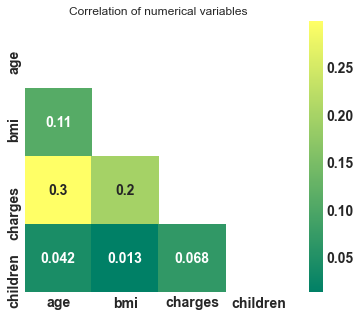

In [7]:
# Generate a mask for the upper triangle
corr_mat = df[['age', 'bmi', 'charges', 'children']].corr()
mask = np.zeros_like(corr_mat, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = 'summer'
#
fig = plt.figure(figsize = (6, 5))
_ = plt.title('Correlation of numerical variables', size = 12)
_ = sns.heatmap(corr_mat, mask = mask, cmap = cmap, annot = True)
_ = plt.ylim((len(corr_mat), 0)) # See bug on bottom cutoff: https://github.com/mwaskom/seaborn/issues/1773
plt.show()

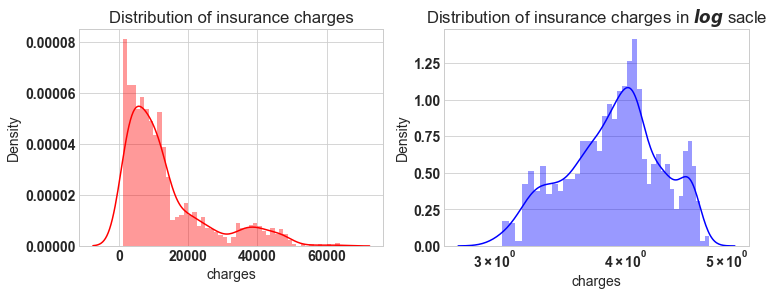

In [8]:
f = plt.figure(figsize=(12,4))
 
ax=f.add_subplot(121)
sns.distplot(df['charges'],bins=50,color='r',ax=ax)
ax.ticklabel_format(style='plain', axis='y')
ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(df['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log');

If we look at the left plot the charges varies from 1120 to 63500, the plot is right skewed. In right plot we will apply natural log, then plot approximately tends to normal. 

For further analysis we will apply log on target variable charges.

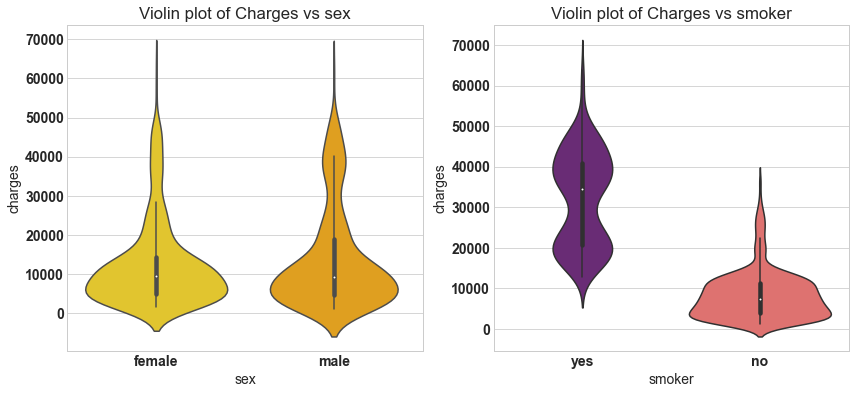

In [9]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='sex', y='charges',data=df,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='smoker', y='charges',data=df,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

From left plot the insurance charge for male and female is approximatley in same range, it is average around 5000 bucks. In right plot the insurance charge for smokers is much wide range compare to non smokers, the average charges for non smoker is approximately 5000 bucks. 

For smoker the minimum insurance charge is itself 5000 bucks.

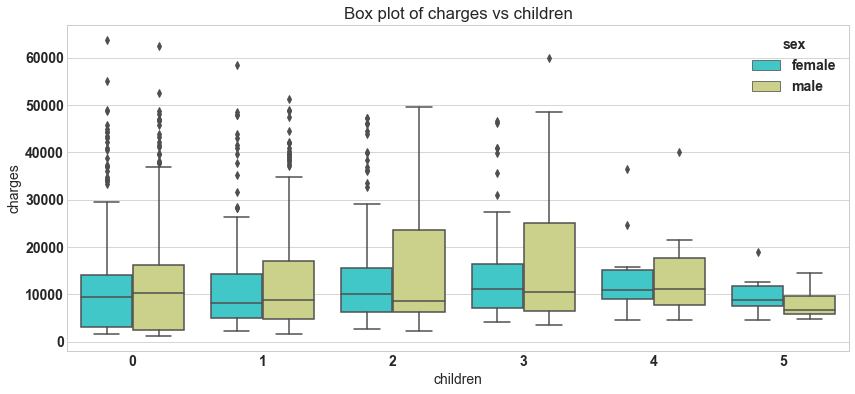

In [10]:
plt.figure(figsize=(14,6))
sns.boxplot(x='children', y='charges',hue='sex',data=df,palette='rainbow')
plt.title('Box plot of charges vs children');

In [11]:
df.groupby('children').agg(['mean','min','max'])['charges']

,mean,min,max
children,,,
0,12365.975602,1121.8739,63770.42801
1,12731.171832,1711.0268,58571.07448
2,15073.563734,2304.0022,49577.66240
3,15355.318367,3443.0640,60021.39897
4,13850.656311,4504.6624,40182.24600
5,8786.035247,4687.7970,19023.26000


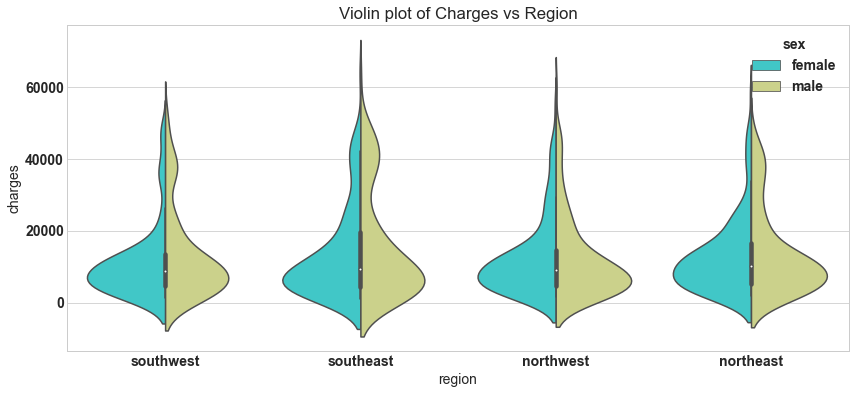

In [12]:
plt.figure(figsize=(14,6))
sns.violinplot(x='region', y='charges', hue='sex',data=df,palette='rainbow',split=True)
plt.title('Violin plot of Charges vs Region');

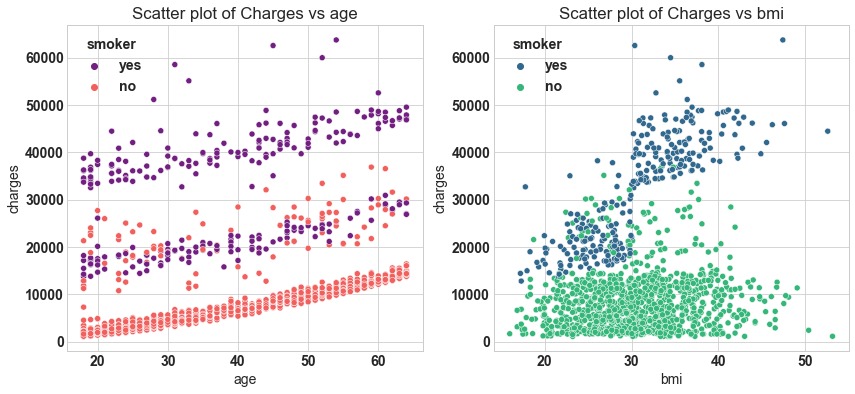

In [13]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.scatterplot(x='age',y='charges',data=df,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatter plot of Charges vs age')

ax = f.add_subplot(122)
sns.scatterplot(x='bmi',y='charges',data=df,palette='viridis',hue='smoker')
ax.set_title('Scatter plot of Charges vs bmi')
plt.savefig('sc.png');

From left plot the minimum age person is insured is 18 year. There is slabs in policy most of non smoker take  1𝑠𝑡  and  2𝑛𝑑  slab, for smoker policy start at  2𝑛𝑑  and  3𝑟𝑑  slab.

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. The minimum bmi is 16 𝑘𝑔/𝑚2  and maximum upto 54 𝑘𝑔/𝑚2

# Data Preprocessing
### Encoding
Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.

**Label encoding** refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.

**One hot encoding** is a representation of categorical variable as binary vectors.It allows the representation of categorical data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.

In [14]:
# Dummy variable
categorical_columns = ['sex', 'children', 'smoker', 'region']
df_encode = pd.get_dummies(data = df,
                           columns = categorical_columns,
                           drop_first =True,
                           dtype='int8')

In [15]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',df.columns.values)
print('\nNumber of rows and columns in the dataset:',df.shape)
print('\nColumns in data frame after encoding dummy variable:\n',df_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',df_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'sex_male' 'children_1' 'children_2' 'children_3'
 'children_4' 'children_5' 'smoker_yes' 'region_northwest'
 'region_southeast' 'region_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [16]:
df_encode.head()

,age,bmi,charges,sex_male,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,16884.92400,0,0,0,0,0,0,1,0,0,1
1,18,33.770,1725.55230,1,1,0,0,0,0,0,0,1,0
2,28,33.000,4449.46200,1,0,0,1,0,0,0,0,1,0
3,33,22.705,21984.47061,1,0,0,0,0,0,0,1,0,0
4,32,28.880,3866.85520,1,0,0,0,0,0,0,1,0,0


### Box -Cox transformation
A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn’t normal, apply Box-Cox or log transformation. 

All that we need to perform this transformation is to find lambda value and apply the rule shown below to your variable.  
>$$\mathbf{ \begin {cases}\frac {y^\lambda - 1}{\lambda},& y_i\neg=0 \\
> log(y_i) & \lambda = 0 \end{cases}}$$

The trick of Box-Cox transformation is to find lambda value, however in practice this is quite affordable. The following function returns the transformed variable, lambda value,confidence interval

In [17]:
from scipy.stats import boxcox
y_bc, lam, ci= boxcox(df_encode['charges'], alpha=0.05)

# df_encode['charges'] = y_bc  
ci, lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

In [18]:
## Log transform
df_encode['charges'] = np.log(df_encode['charges'])

# Train Test Split

In [19]:
X = df_encode.drop('charges',axis=1) # Independet variable
y = df_encode['charges'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=23)

# Model building
In this step build model using our linear regression equation - 
>$\mathbf{\theta = (X^T X)^{-1} X^Ty}$

In [20]:
def normal_equation(X, y):
    ''' 
        For linear regression there exists an equation that can directly give the optimal θ
        - the normal equation. 
    '''
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

# add x0 = 1 to dataset for intercept
X_train_0 = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_test_0 = np.column_stack((np.ones(X_test.shape[0]), X_test))

theta = normal_equation(X_train_0, y_train)
print(theta)

[ 7.05917147  0.03313425  0.01351684 -0.06776735  0.14945669  0.27291869
  0.24409489  0.52333863  0.46603008  1.55048077 -0.05584487 -0.14657831
 -0.13350812]


In [21]:
# The parameters for linear regression model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [22]:
# Unlike sklearn that adds an intercept to our data for the best fit, statsmodel doesn't. 
# We need to add it ourselves.

X_train_endog = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_endog)
ols_reg = model.fit()

In [23]:
print(ols_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     249.6
Date:                Mon, 18 Oct 2021   Prob (F-statistic):          8.08e-280
Time:                        09:20:47   Log-Likelihood:                -569.80
No. Observations:                 936   AIC:                             1166.
Df Residuals:                     923   BIC:                             1229.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                7.0592      0.087  

# Interpreting the Regression Results

**R-squared**: It signifies the "percentage variation in dependent that is explained by independent variables". This statistic has a drawback, it increases with the number of predictors(dependent variables) increase. Therefore, it becomes inconclusive in case when it is to be decided whether additional variable is adding to the predictability power of the regression.

**Adjusted R-squared** This is the modified version of R-squared which is adjusted for the number of variables in the regression. It increases only when an additional variable adds to the explanatory power to the regression.

**Prob(F-Statistic)**: This tells the overall significance of the regression. The null hypothesis under this is "all the regression coefficients are equal to zero". Prob(F-statistics) depicts the probability of null hypothesis being true. As per the above results, probability is close to zero. This implies that overall the regressions is meaningful.

**AIC/BIC**: It stands for Akaike’s Information Criteria and is used for model selection. It penalizes the errors mode in case a new variable is added to the regression equation. It is calculated as number of parameters minus the likelihood of the overall model. A lower AIC implies a better model. Whereas, BIC stands for Bayesian information criteria and is a variant of AIC where penalties are made more severe.

**const coefficient** is your Y-intercept. It means that if both the Interest_Rate and Unemployment_Rate coefficients are zero, then the expected output (i.e., the Y) would be equal to the const coefficient.

**age** coefficient represents the change in the output Y due to a change of one unit in the age (everything else held constant)

**bmi** coefficient represents the change in the output Y due to a change of one unit in the bmi (everything else held constant)

**std err** reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy

**P >|t|** is your p-value. A p-value of less than 0.05 is considered to be statistically significant

**Confidence Interval** represents the range in which our coefficients are likely to fall (with a likelihood of 95%)

**Prob(Omnibus)**: One of the assumptions of OLS is that the errors are normally distributed. Omnibus test is performed in order to check this. Here, the null hypothesis is that the errors are normally distributed. Prob(Omnibus) is supposed to be close to the 1 in order for it to satisfy the OLS assumption. In this case Prob(Omnibus) is much higher than 1, which implies that the OLS assumption is not satisfied. Due to this, the coefficients estimated out of it are not Best Linear Unbiased Estimators(BLUE).

**Durbin-watson**: Another assumption of OLS is of homoscedasticity. This implies that the variance of errors is constant. A value between 1 to 2 is preferred. Here, it is ~2 implying that the regression results are reliable from the interpretation side of this metric.

**Prob(Jarque-Bera)**: It i in line with the Omnibus test. It is also performed for the distribution analysis of the regression errors. It is supposed to agree with the results of Omnibus test. A large value of JB test indicates that the errors are not normally distributed.

In [24]:
#Parameter
results_df = ols_reg.summary().tables[1].as_html()
sm_theta = pd.read_html(results_df, header=0, index_col=0)[0]['coef'].values

parameter_df = parameter_df.join(pd.Series(sm_theta, name='sm_theta'))
parameter_df

,Parameter,Columns,theta,sm_theta
0,theta_0,intersect:x_0=1,7.059171,7.0592
1,theta_1,age,0.033134,0.0331
2,theta_2,bmi,0.013517,0.0135
3,theta_3,sex_male,-0.067767,-0.0678
4,theta_4,children_1,0.149457,0.1495
5,theta_5,children_2,0.272919,0.2729
6,theta_6,children_3,0.244095,0.2441
7,theta_7,children_4,0.523339,0.5233
8,theta_8,children_5,0.466030,0.4660
9,theta_9,smoker_yes,1.550481,1.5505


The parameter obtained from both the model are same.So we succefull build our model using normal equation and verified using sklearn linear regression module. Let's move ahead, next step is prediction and model evaluvation.

## Model evaluation
We will predict value for target variable by using our model parameter for test data set. Then compare the predicted value with actual valu in test set. We compute **Mean Square Error** using formula 
>$$\mathbf{ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$

$\mathbf{R^2}$ is statistical measure of how close data are to the fitted regression line. $\mathbf{R^2}$ is always between 0 to 100%. 0% indicated that model explains none of the variability of the response data around it's mean. 100% indicated that model explains all the variablity of the response data around the mean.

**SSE = Sum of Square Error**  
**SST = Sum of Square Total** 

>$$\mathbf{R^2 = 1 - \frac{SSE}{SST}}$$
>
>$$\mathbf{SSE = \sum_{i=1}^{m}(\hat{y}_i - y_i)^2}$$
>$$\mathbf{SST = \sum_{i=1}^{m}(y_i - \bar{y}_i)^2}$$

Here $\mathbf{\hat{y}}$ is predicted value and $\mathbf{\bar{y}}$ is mean value of $\mathbf{y}$.

In [25]:
# Normal equation
y_pred_norm =  np.matmul(X_test_0, theta)

#Evaluvation: MSE
mse = np.sum((y_pred_norm - y_test)**2)/ X_test_0.shape[0]

# R_square 
sse = np.sum((y_pred_norm - y_test)**2)
sst = np.sum((y_test - y_test.mean())**2)
R_square = 1 - (sse/sst)
print('The Mean Square Error(MSE) is: ',mse)
print('R square obtain for normal equation method is :',R_square)

The Mean Square Error(MSE) is:  0.1872962232298196
R square obtain for normal equation method is : 0.7795687545055311


In [26]:
# statsmodels OLS regression module
X_test_endog = sm.add_constant(X_test)
y_pred_sm = ols_reg.predict(X_test_endog)

In [27]:
# Evaluvation: MSE
# -----------------------------------------------------------------
mse_sm = mean_squared_error(y_pred_sm, y_test)

# R_square
R_square_sm = ols_reg.rsquared
print('The Mean Square Error(MSE) or J(theta) is: ', mse_sm)
print('R square obtain for scikit learn library is :', R_square_sm)

The Mean Square Error(MSE) or J(theta) is:  0.18729622322981537
R square obtain for scikit learn library is : 0.7644299030173098


The model returns  𝑅2  value of ~76%, so it fit our data test very well, but still we can imporve the the performance of by diffirent technique. Please make a note that we have transformer out variable by applying natural log. When we put model into production antilog is applied to the equation.

In [28]:
# residuals
residuals = y_test - y_pred_sm

In [29]:
def abline(slope, intercept):
    """
    Plot a line from slope and intercept
    """
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

## Model Validation
In order to validated model we need to check few assumption of linear regression model. The common assumption for *Linear Regression* model are following
1. **Linear Relationship**: There should be a linear relationship between dependent (response) variable and independent (predictor) variable(s). A linear relationship suggests that a change in response Y due to one unit change in X is constant, regardless of the value of X.
    - This is required for our estimator and predictions to be unbiased. 
    - This can be checked by scatter ploting Actual value Vs Predicted value
2. **Independent errors(No multicollinearity)** - Linear regession assumes that there is little or **no Multicollinearity** in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. 
    - If this is not satisfied, our estimator will suffer from high variance.
    - The variance inflation factor *VIF* identifies correlation between independent variables and strength of that correlation. $\mathbf{VIF = \frac {1}{1-R^2}}$, If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.
3. **Normally distributed errors**:
    - The **mean of residual error** should be 0 or close to 0 as much as possible. Our errors are normally distributed with 0 mean. 
    - This is necessary for a range of statistical tests, such as the t-test. We can relax this assumption in large samples due to the central limit theorem.
4. **Equal Variance (Homoscedasticity)**: The data are homoscedastic meaning the residuals are equal across the regression line. 
    - Our errors should have equal variance. If this is not satisfied, there will be other linear estimators with lower variance.
    - We can look at residual Vs fitted value scatter plot. A heteroscedastic plot would exhibit a funnel shape pattern.

> **LINE**

> - Linearity: The relationship between X and Y is linear.
> - Independence: Observations are independent of each other.
> - Normality: For any fixed value of X, Y is normally distributed.
> - Equal variance (Homoscedasticity): The variance of residual is the same for any value of X.

### Checking the assumption of Linearity

We can visually check this by fitting ordinary least squares (OLS) on training data, and then using it to predict our training data. We then plot the **predictions vs actual**. We should observe that the points are approximately symmetric about a line through the origin with slope 1.

> **Note** - To overcome the issue of non-linearity, you can do a non linear transformation of predictors such as log (X), √X or X² transform the dependent variable.

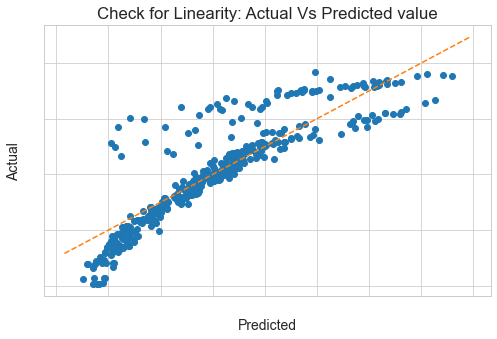

In [30]:
#plot predicted vs actual
plt.plot(y_pred_sm, y_test,'o')
plt.xlabel('Predicted')#,color='white')
plt.ylabel('Actual')#,color='white')
plt.title('Check for Linearity: Actual Vs Predicted value')#,color='white')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
abline(1,0)
plt.show()

**Harvey Collier test for linearity**

The Null hypothesis is that the regression is correctly modeled as linear.

In [31]:
# Harvey-Collier multiplier test, for linearity
# ------------------------------------------------------------------
name = ['lm', 'lmpval', 'fval', 'fpval']
test = sm.stats.diagnostic.acorr_lm(ols_reg.resid)
lzip(name, test)

[('lm', 0.031874922668368444),
 ('lmpval', 0.8583024486544367),
 ('fval', 0.031807825370636506),
 ('fpval', 0.8584888056185709)]

### Checking the assumption of Multicollinearity

When checking the assumption of multicollinearity you check if one or more variables used in the model are not to strongly correlated amongst eachother. At least the correlation between the predictors should not be to high (that is higher than 0.80). One way to check is this, is to make a correlation matrix with all predictor variables. An easier way is to look at the **variance inflation factor (VIF)**.

> **Note** - For influential observations which are nothing but outliers, if not many, you can remove those rows. Alternatively, you can scale down the outlier observation with maximum value in data or else treat those values as missing values.

In [32]:
# Check for Multicollinearity - Variance Inflation Factor
# ------------------------------------------------------------------
VIF = 1/(1- R_square_sm)
VIF

4.245020963223022

In [33]:
# A VIF of over 10 for some feature indicates that over 90\% of the variance in that feature 
# is explained by the remaining features.
# ------------------------------------------------------------------

X_train_np = np.array(X_train)
vif = [variance_inflation_factor(X_train_np, i) for i in range(X_train_np.shape[1])]
print (vif)
# We will need to do variable selection or regularization to deal with variables having vif more than 10

[7.7825244682117924, 11.299605224461226, 2.0397937892071636, 1.5059426654810404, 1.3835563805002395, 1.267060403918247, 1.0381668316918848, 1.0432766768688895, 1.2857690135040987, 1.8590994817937072, 2.247167199698096, 1.8745042260670228]


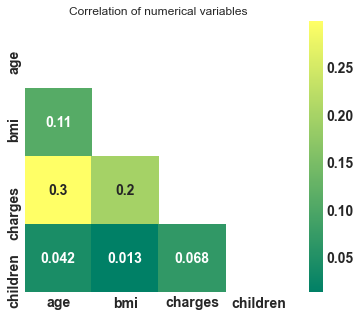

In [34]:
# Generate a mask for the upper triangle
corr_mat = df[['age', 'bmi', 'charges', 'children']].corr()
mask = np.zeros_like(corr_mat, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
# Generate a custom diverging colormap
cmap = 'summer'
#
fig = plt.figure(figsize = (6, 5))
_ = plt.title('Correlation of numerical variables', size = 12)
_ = sns.heatmap(corr_mat, mask = mask, cmap = cmap, annot = True)
_ = plt.ylim((len(corr_mat), 0)) # See bug on bottom cutoff: https://github.com/mwaskom/seaborn/issues/1773
plt.show()

### Influence tests

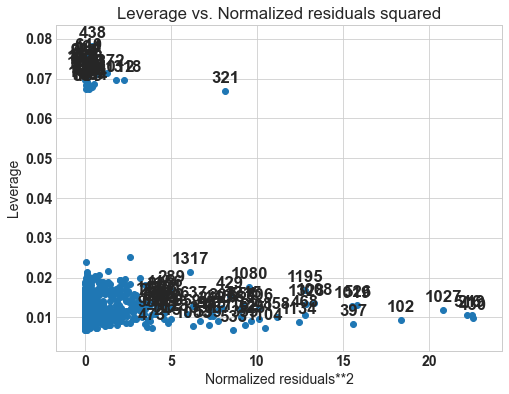

In [35]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(ols_reg, ax = ax)

### Checking asumption for Normality of error terms/residuals
Another assumption is normality of error terms, and we test normality of residuals as a substitute since we don’t know the true error terms. We first make a QQ-plot. This plots theoretical quantiles of a Gaussian vs observed values. If points approximately lie on the red line, then the plot is approximately Gaussian.

To check this, you need to plot the standardized residuals (on the y-axis) against and the predicted residuals (on the x-axis). This plot should look like random dots evenly distributed amongst the zero line.

> **Note** - If the errors are not normally distributed, non – linear transformation of the variables (response or predictors) can bring improvement in the model.

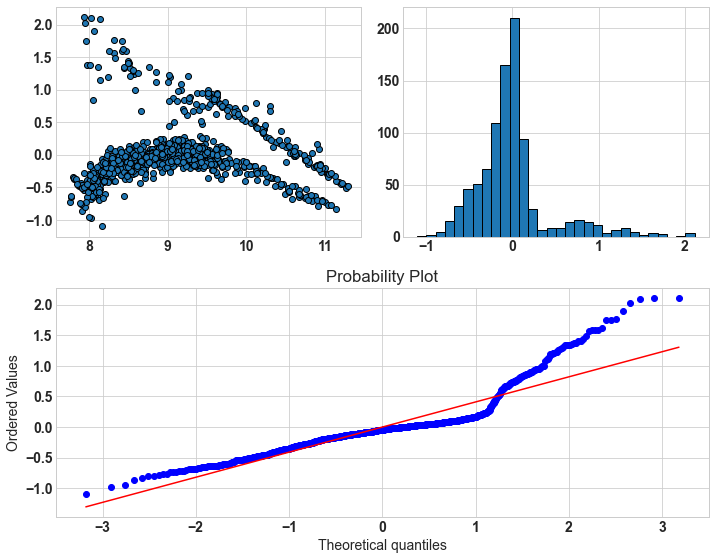

In [38]:
# Check for Multivariate Normality - Quantile-Quantile plot - Test Gaussian Residuals
# ------------------------------------------------------------------
fig = plt.figure(num = 2, figsize = (10, 8))
# Plot fitted vs residual plots:
ax = fig.add_subplot(2, 2, 1)
_ = ax.plot(ols_reg.fittedvalues, ols_reg.resid, linestyle = "None", marker = "o", markeredgecolor = "black")
# Plot the residual histogram
ax = fig.add_subplot(2, 2, 2)
_ = ax.hist(ols_reg.resid, bins = 30, edgecolor = "black")
# Plot the residual Q-Q plot:
ax = fig.add_subplot(2, 1, 2)
_ = stats.probplot(ols_reg.resid, dist = "norm", plot = ax)
# Fix layout in case the labels do overlap:
_ = plt.tight_layout()
plt.show()

Here we see that we have fat tails, and the data is not Gaussian(normally distributed) at the tails.

There are three common ways to deal with normality violations: 
 - Transform either your features or your response 
 - Fit a GLM instead of doing linear regression 

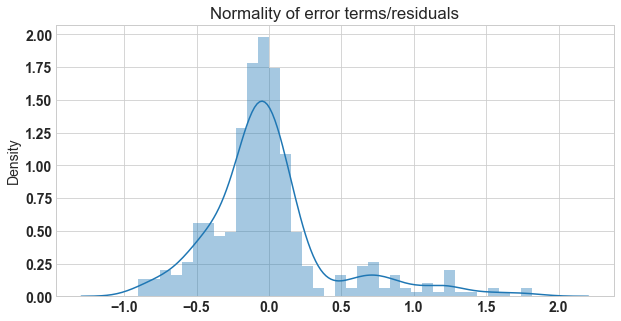

In [39]:
# Check for Residual normality & mean
# ------------------------------------------------------------------
f = plt.figure(figsize=(10,5))

p = sns.distplot(residuals, kde=True)
p = plt.title('Normality of error terms/residuals')

**Jarque-Bera test**: tests the null that the data is normally distributed against an alternative that the data follow some other distribution. 

The test statistic is based on two moments of the data, the skewness, and the kurtosis.

- Null hypothesis : The data is normally distributed.
- Alternate hypothesis : The data is not normally distributed.

In [40]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(residuals)

print (test[1])
# Samples from a normal distribution have an expected skewness of 0 and an expected excess kurtosis of 0
if test[1] < 0.05:
    print ('p-value is less than the 5% significance level for Jarque-Bera test')
    print ('Hence we would reject the null hypothesis of normality')

1.0761576035215882e-63
p-value is less than the 5% significance level for Jarque-Bera test
Hence we would reject the null hypothesis of normality


### Checking asumption of Homoskedasticity

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error terms.

Heteroskedasticity is a problem because it implies that the OLS estimator is no longer a best linear unbiased estimator and some other estimators may have lower variance.

> **Note** - To overcome heteroskedasticity, a possible way is to transform the response variable such as log(Y) or √Y. Also, you can use weighted least square method to tackle heteroskedasticity.

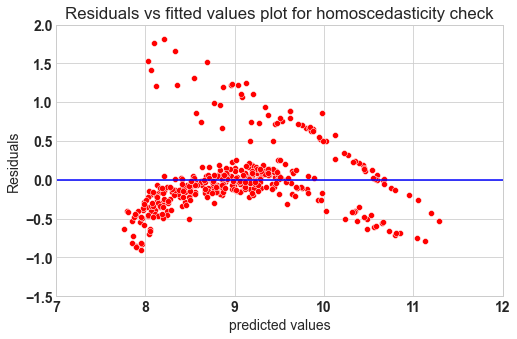

In [41]:
# Detecting heteroscedasticity!
# Graphical Method: Firstly do the regression analysis and then plot the error terms against the predicted values. 
# If there is a definite pattern (like linear or quadratic or funnel shaped) obtained from the scatter plot 
# then heteroscedasticity is present.
# ---------------------------------------------------------------------
p = sns.scatterplot(y_pred_sm, residuals, color='red')
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.ylim(-1.5, 2)
plt.xlim(7, 12)
p = sns.lineplot([0,26],[0,0], color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

It looks like the magnitude is increasing as a function of the predicted. Next we fit a linear model regressing and plot the predicted squared residuals to see if there is a relationship.

Text(0, 0.5, 'Squared Residual')

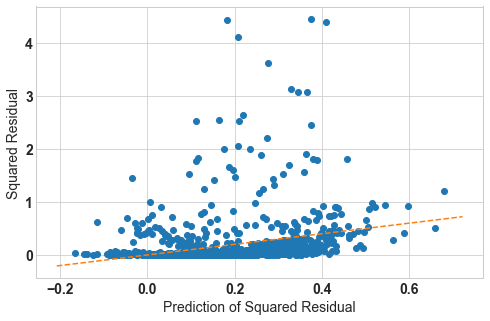

In [42]:
y_hat = model.predict(ols_reg.params)
y_np = np.array(y_train)

resid_model = sm.OLS((y_np - y_hat)**2, X_train_np) 
results_resid = resid_model.fit() 
resid_predict = resid_model.predict(results_resid.params) 

plt.plot(resid_predict,(y_np - y_hat)**2,'o')
abline(1, 0)
plt.xlabel('Prediction of Squared Residual')
plt.ylabel('Squared Residual')

It looks like there is a relationship. 

**Breusch pagan test**

We can make this more formal by conducting a Breusch pagan test for significant coefficients. If it does, then we reject the null hypothesis of homoskedasticity in favor of heteroskedasticity.

A tip is to keep in mind that if we want 95% confidence on our findings and tests then the p-value should be less than 0.05 to be able to reject the null hypothesis. Remember, a researcher or data scientist would always aim to reject the null hypothesis.

**Null Hypothesis**: Error terms are homoscedastic

**Alternative Hypothesis**: Error terms are heteroscedastic.

In [43]:
# Breusch-Pagan test - for equal variance 
# ------------------------------------------------------------------
from statsmodels.stats.diagnostic import het_breuschpagan
lm, lm_pvalue, fvalue, f_pvalue = het_breuschpagan(ols_reg.resid, ols_reg.model.exog)

print (lm_pvalue)

# We are interested in the LM(BP) statistic and its associated p-value. 
# We have that the p-value < 0.05, so we reject the null hypothesis that the residuasl are homoskedastic. 
# Which means that the residuals are heteroskedastic.
if lm_pvalue < 0.05:
    print ('p-value for the test statistic is %f, thus we reject the null hypothesis in favor of heteroskedasticity' % (lm_pvalue))

4.418251983954017e-11
p-value for the test statistic is 0.000000, thus we reject the null hypothesis in favor of heteroskedasticity


### Checking the assumption of Independence

When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.
In plain terms autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. 

There should not be autocorrelation in the data so the error terms should not form any pattern.

**Durbin-Watson test** - One of the assumptions of linear regression is that there is no correlation between the residuals. In other words, the residuals are assumed to be independent.

One way to determine if this assumption is met is to perform a Durbin-Watson test, which is used to detect the presence of autocorrelation in the residuals of a regression. This test uses the following hypotheses:

- H0 (null hypothesis) : There is no correlation among the residuals.
- HA (alternative hypothesis) : The residuals are autocorrelated.

The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, the test statistic will always be between 0 and 4 with the following interpretation:

A test statistic of 2 indicates no serial correlation.
- The closer the test statistics is to 0, the more evidence of positive serial correlation.
- The closer the test statistics is to 4, the more evidence of negative serial correlation.

As a rule of thumb, test statistic values between the range of 1.5 and 2.5 are considered normal. However, values outside of this range could indicate that autocorrelation is a problem.

In [44]:
# We will begin with the Durbin-Watson Test, where the alternative hypothesis is that the 
# autocorrelation is of order 1
from statsmodels.stats.stattools import durbin_watson
durbin_watson(ols_reg.resid)

2.0114525557692295

**If the residual errors aren’t independent, it may mean a number of things:**
- One or more important explanatory variables are missing from your model. The effect of the missing variables is showing through as a pattern in the residual errors.
- The linear model you have built is just the wrong kind of model for the data set. For e.g. if the data set shows obvious non-linearity and you try to fit a linear regression model on such a data set, the nonlinear relationships between y and X will show through in the residual errors of regression in the form of a distinct pattern.
- A third interesting cause of non-independence of residual errors is what’s known as multicolinearity which means that the explanatory variables are themselves linearly related to each other. Multicolinearity causes the model’s coefficients to become unstable, i.e. they will swing wildly from one training run to next when trained on different training sets. This can make the model’s overall goodness-of-fit statistics questionable. Another serious effect of multicoliearity, especially extreme multicolinearity, is that the model’s least squares solver may throw up infinities during the model fitting process thereby making it impossible to fit the model on the training data.

### The model assumption linear regression as follows
1. In our model  the actual vs predicted plot is curve so linear assumption fails
2. The residual mean is zero and residual error plot right skewed
3. The plot is exhibit heteroscedastic, error will increase after certian point.
4. Variance inflation factor value is less than 5, so no multicollearity.

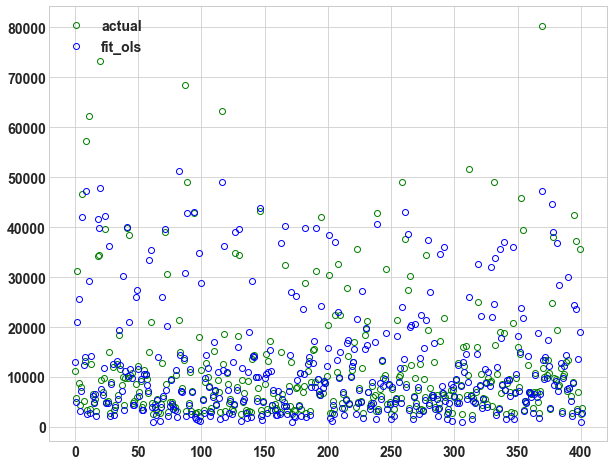

In [45]:
fig = plt.figure(num = 15, figsize = (10, 8))
_ = plt.plot(list(range(0, len(X_test.index))), np.exp(y_pred_sm), label = "actual", 
          linestyle = "None", marker = "o", color = "None", markeredgecolor = "green")
_ = plt.plot(list(range(0, len(X_test.index))), np.exp(y_test), label = "fit_ols", 
          linestyle = "None", marker = "o", color = "None", markeredgecolor = "blue")
_ = plt.legend(loc = "best")          
plt.show()